# Regressão

## Exemplo - O problema dos preços de imóveis em Boston

O módulo `datasets` da scikit-learn apresenta funções que carregam alguns conjuntos de dados *clássicos* da literatura de aprendizado de máquina e reconhecimento de padrões. Vamos utilizá-lo para carregar o *Boston House Prices dataset*.
Para mais detalhes, veja [Dataset loading utilities](http://scikit-learn.org/stable/datasets/index.html#datasets) na documentação oficial da scikit-learn.

In [1]:
from sklearn import datasets 
boston = datasets.load_boston()

O que há afinal neste dataset? O atributo `DESCR` contém uma descrição do conteúdo:

In [2]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
boston.data.shape

(506, 13)

In [4]:
n_samples = boston.data.shape[0]
n_samples

506

In [5]:
boston.data[0]

array([  6.32000000e-03,   1.80000000e+01,   2.31000000e+00,
         0.00000000e+00,   5.38000000e-01,   6.57500000e+00,
         6.52000000e+01,   4.09000000e+00,   1.00000000e+00,
         2.96000000e+02,   1.53000000e+01,   3.96900000e+02,
         4.98000000e+00])

In [6]:
boston.target.shape

(506,)

## Distância aos centros de emprego vs. preço

In [7]:
import numpy as np

# Importa o módulo de plotagem
import matplotlib.pyplot as plt

# Configura a matplotlib para operar interativamente no notebook. Para detalhes, execute:
# %matplotlib?
%matplotlib inline

# Configura o tamanho padrão da figura largura X altura, em polegadas
plt.rcParams['figure.figsize'] = (10, 8)

Text(0,0.5,u'Valor m\xe9dio (em US$ 1.000)')

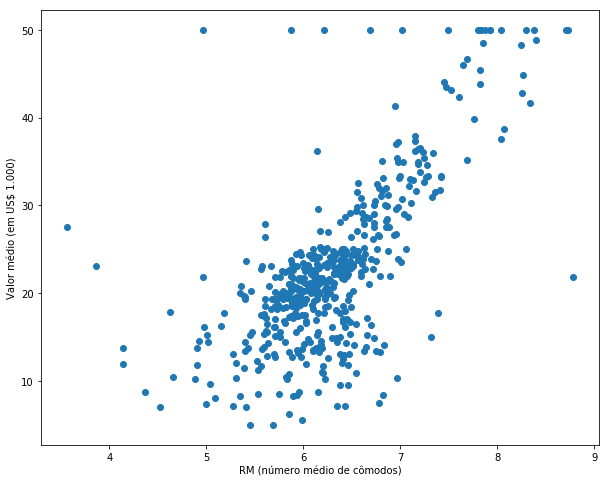

In [8]:
plt.scatter(boston.data[:,5], boston.target)
plt.xlabel(u'RM (número médio de cômodos)')
plt.ylabel(u'Valor médio (em US$ 1.000)')

# Produzindo conjuntos de treinamento e teste

`ShuffleSplit` é um utilitário que produz um *gerador de dados*. Toda vez que o gerador é chamado, ele **embaralha** o conjunto de dados (*shuffle*) e o **divide** em dois conjuntos, *treinamento* e *teste* (*split*):

In [9]:
from sklearn.model_selection import ShuffleSplit

In [10]:
# Cria o objeto, indicando que 25% dos dados devem ser utilizados no
# conjunto de teste e 75% no treinamento. Nós só iremos utilizar
# o procedimento uma única vez, gerando um único par treinamento/teste.
s = ShuffleSplit(1, test_size=0.25)

In [11]:
# Obtém o gerador
gs = s.split(boston.data)

# Obtém a divisão treinamento e teste
train, test = gs.next()

Mas o que há nas variáveis `train` e `test`?

In [12]:
train

array([277, 494, 400,  97, 361, 369, 211, 307,  98, 500,  81, 180,  84,
       185, 370, 154, 201, 171, 466, 456, 320, 450, 258,  56, 196, 243,
       107, 311, 374, 274, 300, 489, 162,   4, 478,  83, 109, 448, 264,
       283, 482, 225, 483, 217, 263, 309,  32, 166, 169, 302, 295, 297,
       148, 215, 383, 458, 438, 467,  93, 255, 149, 473, 357,  26, 382,
        61, 318, 388, 288, 404,  58, 260, 150, 276,  69, 359, 401, 349,
       421, 313, 476,  64, 415, 124, 419, 132,  68, 463, 325, 377, 222,
        87, 104,   6,  55, 364,  86, 427, 422, 205,  51, 293, 125, 338,
        94,  75, 332, 491, 337, 417, 420, 176, 378, 127,  18,  30, 254,
       179, 100, 372, 272,  73, 257, 294, 143, 145, 391, 452,  63, 432,
       301, 502, 226,  40, 115, 462, 221, 167, 275, 303,  49, 112, 266,
        57, 187, 174,  33, 411, 116, 160, 471,  16, 101, 102, 329,  12,
       449,  35,  52, 279, 457, 152,  42, 133, 138,  53, 317,  48, 202,
       114, 216, 170, 487, 199, 499,  74, 194,  31,  89, 122, 49

In [13]:
test

array([402, 416, 164, 503, 183, 330, 269, 177, 259, 475, 189,  28,  78,
       248, 355, 441, 481, 327,  72,  88, 246, 262, 224, 155, 220, 425,
       464, 362, 134, 319, 212,  43,  19, 431, 136, 210, 188,  60,  92,
        17, 385, 287, 232, 424, 384, 331, 184, 228, 200,  45,  22, 316,
       147, 291, 469, 344,   0, 292,  70, 137, 237,  99, 151, 389, 206,
       443, 446, 120,  96, 197, 261,   2, 461, 192, 135, 365, 376,   3,
       290, 392, 405, 386, 418,  10, 130, 242, 128, 117, 358, 497,  71,
       314, 296, 504, 265, 439, 233, 282, 213, 347, 273, 298, 366, 165,
        41, 498,  14, 108, 352,   7, 308, 234, 395, 204, 230, 229, 371,
       285, 119, 146, 447,  80, 140, 408, 208, 495, 410])

São *índices* que dividem o dataset. Podemos utilizar *fancy indexing* dos arrays NumPy para separar os conjuntos de treinamento e teste.

## Exemplo - regressão utilizando apenas RM

Vamos prever o preço dos imóveis utilizando apenas o **número de cômodos** (RM), que corresponde a coluna 5 da nossa tabela de dados. Nosso conjunto de observaçãoes de treinamento deverá ser um array `n_samples` X `n_dims` no qual `n_dims` é 1 e `n_samples` é o número de amostras no conjunto de treinamento.

In [14]:
# Usa fancy indexing para obter as linhas do conjunto de dados original 
# que constituem o conjunto de treinamento:
X_train = boston.data[train, 5]

# Reformata o array para as dimensões adequadas. A opção (-1, 1) indica
# que desejamos apenas 1 coluna e o número de linhas adequado deve ser
# encontrado automaticamente.
X_train = X_train.reshape(-1, 1)
X_train.shape

(379, 1)

Nosso conjunto de treinamento possui 379 amostras.

In [15]:
y_train = boston.target[train]

### Treinamento

Aqui, vamos utilizar a **regressão linear**

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

(0, 55)

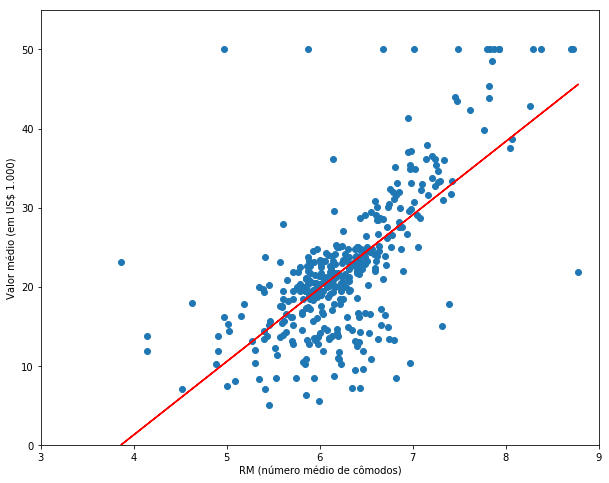

In [18]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regr.predict(X_train), 'r-')
plt.xlabel(u'RM (número médio de cômodos)')
plt.xlim((3,9))
plt.ylabel(u'Valor médio (em US$ 1.000)')
plt.ylim((0,55))

Erro quadrático médio:

In [19]:
np.mean((regr.predict(X_train) - y_train)**2)

43.530289390070884

#### Score

O coeficiente $R^2$ é definido como $(1 - \frac{u}{v})$ em que

$u = \sum_{i} (y_i - \hat{y_i})^2$

$v = \sum_{i} (y_i - \mu_y)^2$

O melhor *score* possível é 1.0 e o pior possível 0.0

In [20]:
regr.score(X_train, y_train)

0.48203570662752382

### Teste

In [21]:
X_test = boston.data[test, 5].reshape(-1, 1)
y_test = boston.target[test]

Erro quadrático médio:

In [22]:
np.mean((regr.predict(X_test) - y_test)**2)

43.893744876314493

*Score*

In [23]:
regr.score(X_test, y_test)

0.4849112475733684

(0, 55)

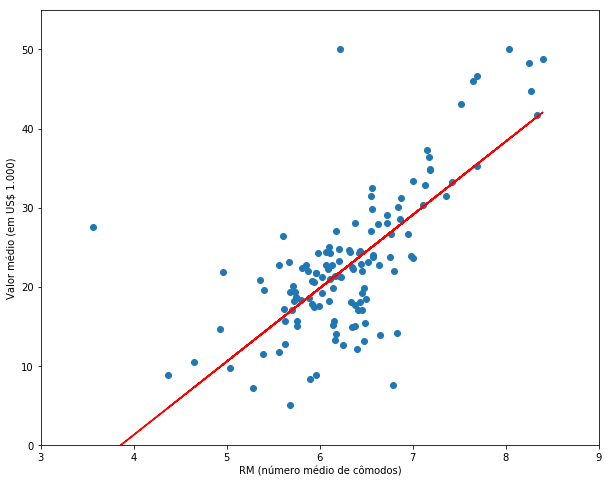

In [24]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regr.predict(X_test), 'r-')
plt.xlabel(u'RM (número médio de cômodos)')
plt.xlim((3,9))
plt.ylabel(u'Valor médio (em US$ 1.000)')
plt.ylim((0,55))

(0, 55)

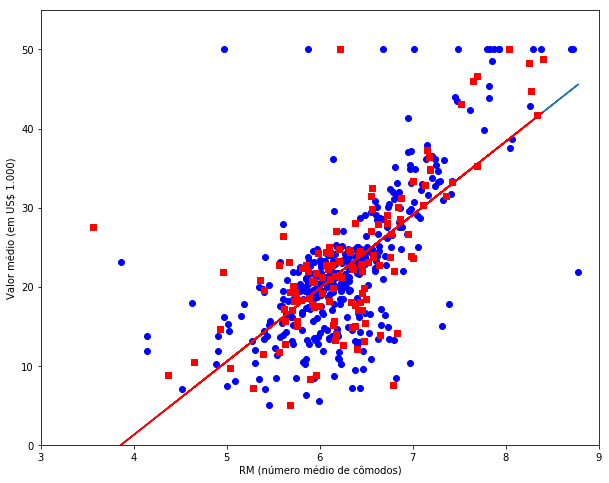

In [25]:
plt.scatter(X_train, y_train, c='b', marker='o')
plt.scatter(X_test, y_test, c='r', marker='s')
plt.plot(X_train, regr.predict(X_train))
plt.plot(X_test, regr.predict(X_test), 'r-')
plt.xlabel(u'RM (número médio de cômodos)')
plt.xlim((3,9))
plt.ylabel(u'Valor médio (em US$ 1.000)')
plt.ylim((0,55))

O que o erro quadrático médito está nos informando? Que, em média, estamos errando o valor em cerca de 6000 a 7000 dólares para cima ou para baixo. Nada mal se considerarmos que estamos apenas considerando o número de quartos da residência. Podemos fazer melhor?

## Exemplo - regressão utilizando todas as dimensões

Dados:

In [26]:
X_train, X_test = boston.data[train], boston.data[test]
y_train, y_test = boston.target[train], boston.target[test]

In [27]:
print(X_train.shape)
print(y_train.shape)

(379, 13)
(379,)


In [28]:
print(X_test.shape)
print(y_test.shape)

(127, 13)
(127,)


### Treinamento

In [29]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Erro quadrático médio

In [30]:
np.mean((regr.predict(X_train) - y_train)**2)

22.318532736939051

*Score*

In [31]:
regr.score(X_train, y_train)

0.73443312231147362

### Teste

Erro quadrático médio

In [32]:
np.mean((regr.predict(X_test) - y_test)**2)

21.213656346362121

*Score*

In [33]:
regr.score(X_test, y_test)

0.75105984206530452

Erro médio em cerca de US\$ 4600. Considerando que estamos modelando por uma linha reta em um espaço com dimensão 13, não é tão ruim. Este é o nosso **modelo** aqui: uma reta.

## Lasso 

- Lasso é capaz de produzir **modelos esparsos**
    - Modelos que usam um **subconjunto** das variáveis
- O ideia é reduzir os coeficientes de algumas variáveis **zero**
- Modelos Lasso são assim mais fáceis de interpretar
- Pode ser entendido como uma aplicação da **faca de Occam**
    - *Prefira modelos mais **simples** *

In [34]:
gs = ShuffleSplit(1, test_size=0.25).split(boston.data)
train, test = gs.next()

X_train, y_train = boston.data[train], boston.target[train]
X_test, y_test = boston.data[test], boston.target[test]

In [35]:
from sklearn.linear_model import Lasso

In [36]:
lasso_regr = Lasso()
lasso_regr.set_params(alpha=0.001)
lasso_regr.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [37]:
np.mean((lasso_regr.predict(X_test) - y_test)**2)

20.852612734040378

In [43]:
boston_vars = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [44]:
for descr, coefficient in zip(boston_vars, lasso_regr.coef_):
    print "%.3f\t%s" % (coefficient, descr)

-0.086	CRIM
0.046	ZN
0.069	INDUS
1.520	CHAS
-20.364	NOX
3.785	RM
0.012	AGE
-1.458	DIS
0.324	RAD
-0.014	TAX
-1.057	PTRATIO
0.009	B
-0.539	LSTAT
